# 1 Linear Regression with One Variable

We have a file ext1data1.txt that contains our dataset of our linear regression problem. The first column is the population of the city and the second column is the profit of having a store in that city. A negative value for profit indicates a loss. 

Before starting, it is useful to understand the data by visualizing it.  We will use the scatter plot to visualize the data, since it has only two properties to plot (profit and population).

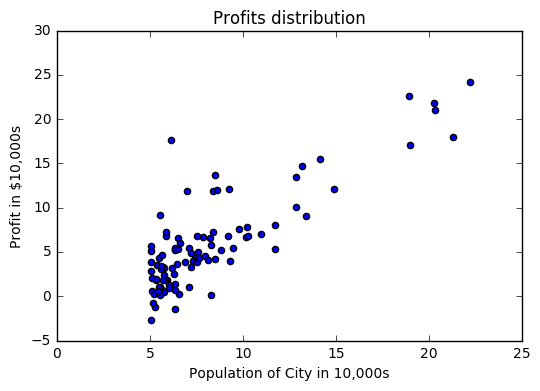

In [90]:
from numpy import loadtxt, ones, zeros,  array, linspace, logspace
#from pylab import scatter, show, xlabel, ylabel, title, plot, contour
import matplotlib.pyplot as plt

# Load the datasets
data = loadtxt('ex1data1.txt', delimiter=',')

# Plot the data
plt.scatter(data[:,0], data[:,1], marker = 'o', c = 'b')
plt.title('Profits distribution')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

m = len(data[:,0])
X = ones(shape=(m, 2)) #Add a column of ones to X (interception data)
X[:, 1] = data[:,0] 
y = data[:, 1]
#number of training samples



We want to use linear regression to predict the profit given the population of the city. In this case population of the city is our input variable. We are going to denote it by $x$. Similary, profit is the output variable and will be denoted by $y$. Therefore $(x^i, y^i)$ denotes the ith training example. All the training examples are plotted above. Let $m$ be the number of training examples.

Since we will use linear regression, the form of the function that will be learned is 
\begin{equation}
h(x) = \theta_0 + \theta_1 x
\end{equation}

The parameters of the model are the \theta values. These are the values we want to adjust to minimize the cost. The cost in our case is the least mean square cost given by the following equation.
\begin{equation}
J(\theta) = \frac{1}{2m}\sum_{i=1}^{m} (h(x^i)-y^i)^2
\end{equation}

The following function implements the cost. Make sure you understand what the function is doing

In [91]:
#Evaluate the linear regression
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta).flatten()

    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J

## Task 1
For following different values of $\theta$ fill the folling table and draw the corresponding hypothesis. For the first $\theta$ values, I have filled the table and also drawn the plots.

 $\theta$ | $J(\theta)$   
 ------   |-------------  
  (10,0) |  23.68             
  (0,1)   | 7.445           
  (-5,1)  | 8.345      


23.681383361991752


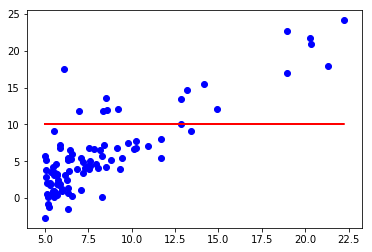

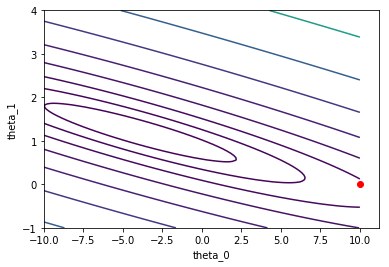

7.445855542929897


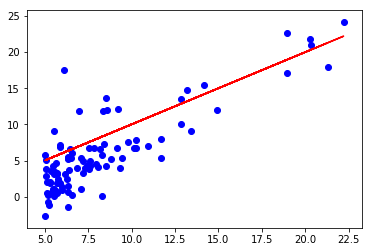

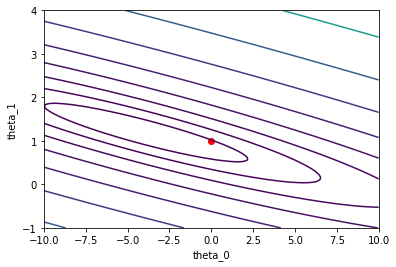

8.342530800661855


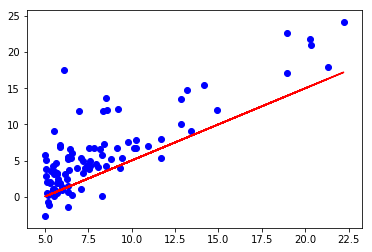

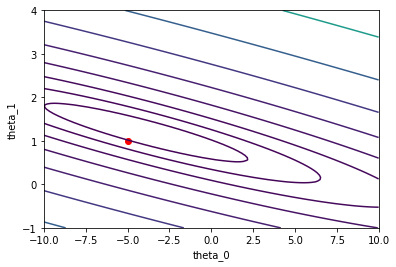

In [4]:
from numpy import loadtxt, ones, zeros,  array, linspace, logspace
#from pylab import scatter, show, xlabel, ylabel, title, plot, contour
import matplotlib.pyplot as plt

# Load the datasets
data = loadtxt('ext1data1.txt', delimiter=',')


m = len(data[:,0])
X = ones(shape=(m, 2)) #Add a column of ones to X (interception data)
X[:, 1] = data[:,0] 
y = data[:, 1]
#number of training samples
#Evaluate the linear regression
def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size

    predictions = X.dot(theta).flatten()

    sqErrors = (predictions - y) ** 2

    J = (1.0 / (2 * m)) * sqErrors.sum()

    return J
theta_array = array([[10,0],[0,1],[-5,1]])
for i in theta_array:
    theta = i
    print(compute_cost(X,y,theta))

    #Plot the results
    result = X.dot(theta).flatten()
    plt.plot(X[:, 1], result, c = 'r')
    plt.scatter(X[:,1], y, c = 'b')
    plt.show()

    plt.figure()
    #Grid over which we will calculate J
    theta0_vals = linspace(-10, 10, 100)
    theta1_vals = linspace(-1, 4, 100)


    #initialize J_vals to a matrix of 0's
    J_vals = zeros(shape=(theta0_vals.size, theta1_vals.size))

    #Fill out J_vals
    for t1, element in enumerate(theta0_vals):
        for t2, element2 in enumerate(theta1_vals):
            thetaT = zeros(shape=(2, 1))
            thetaT[0][0] = element
            thetaT[1][0] = element2
            J_vals[t1, t2] = compute_cost(X, y, thetaT)

    #Contour plot
    J_vals = J_vals.T
    #Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
    plt.contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.scatter(theta[0], theta[1], c = 'r')
    plt.show()


## Task 2

We will use batch gradient descent to minimize the cost function. (Read Lecture_notes1.pdf)
Implement the gradient_descent algorithm (#todo parts of the following function)

In [18]:
def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta).flatten()
        
        #TODO compute gradient
        grad_x1 = (1/m)*( (predictions - y)* X[:,0]).sum()
        grad_x2 = (1/m)*( (predictions - y)* X[:,1]).sum()

        #TODO update the thetas
        theta[0] = theta[0]- alpha*grad_x1
        theta[1] = theta[1]- alpha*grad_x1

        J_history[i, 0] = compute_cost(X, y, theta)
        
    return theta, J_history

## Task3

Run the gradient descent algorithm for num_iters = 1500 and the learning rate, alpha=.01.
Initialize the theta to (0,0). Plot the final result

In [19]:
alpha = .01
num_iters = 1500
theta = array([0.,0.])

theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)
print(theta)

[0.63747408 0.63747408]


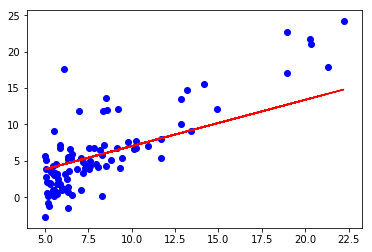

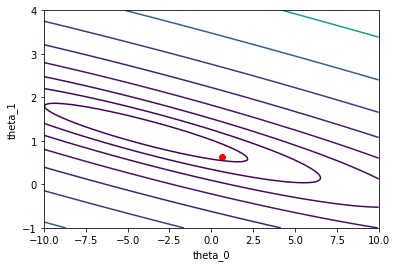

In [20]:
#Plot the results
result = X.dot(theta).flatten()
plt.plot(X[:, 1], result, c = 'r')
plt.scatter(X[:,1], y, c = 'b')
plt.show()

plt.figure()
#Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100)
theta1_vals = linspace(-1, 4, 100)


#initialize J_vals to a matrix of 0's
J_vals = zeros(shape=(theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = zeros(shape=(2, 1))
        thetaT[0][0] = element
        thetaT[1][0] = element2
        J_vals[t1, t2] = compute_cost(X, y, thetaT)

#Contour plot
J_vals = J_vals.T
#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.scatter(theta[0], theta[1], c = 'r')
plt.show()

